## <center>Khalifa University</center>
## <center>Computer Science Department
### <center>ENGR 202: Data Science and Artificial Intelligence- Fall 2024
# <center>Lab8: Supervised Machine Learning - Artificial Neural Network
### Aim: 

This lab aims to introduce you to the artificial neural network model and its architectures used in classification and regression problems. You will use the knowledge you gained from the last labs to fine-tune its parameters. 

### Objectives:		

* Learn how to implement artificial neural networks (ANN) for regression and classification.

* Solidate concepts of fine-tuning, training, and evaluation for machine learning models

* Learn how to save the trained model weights locally and reuse them.

#### Risk Assessment: Low


# Introduction:

The labs consist of two parts: you will practice the ANN model with classification problems, and the next part will familiarize you with ANN architecture with regression problems.

## Part (1): Artificial Neural Network with Classification Problem

In this section, you will use the `MNIST` dataset to train a neural network model. `MNIST` consists of images containing numbers A-Z, and your goal is to train the model to correctly the contained letter for the given image. 


Run below code to load the training, validation, and testing dataset, and modify the missing parts.

In [2]:
!pip install tensorflow

from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

2024-11-04 11:33:37.201563: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 11:33:37.205487: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 11:33:37.214349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730705617.229421    1733 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730705617.233739    1733 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-04 11:33:37.249968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

**Q1** Split the training dataset into 80% training and 20% validation

In [3]:
from sklearn.model_selection import train_test_split

train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)
train_labels, val_labels = train_test_split(train_labels, test_size=0.2, random_state=42)

**Q2**: Print the size of the train, test, and validation datasets. (Labels only) 

In [4]:
print(train_labels.shape, test_labels.shape, val_labels.shape)

(48000,) (10000,) (12000,)


We want to ensure that the pixel value is in type `float32` to prevent exceptions (errors) during the data preprocessing. Moreover, the neural network does not accept images, like 28x28. Instead, the images should be flattened

**Q3** Flatten the splits data using `reshape` and convert it into `float32` type using `astype()` method.

In [5]:
train_images = train_images.reshape(-1, 28 * 28).astype('float32')
# Do the same for the testing and validation images.
test_images = test_images.reshape(-1, 28 * 28).astype('float32')
val_images = val_images.reshape(-1, 28 * 28).astype('float32')

**Q4** Why we do not do the same on the labels?

Since the labels are already a single value we do not need to flatten it or reshape it into lower dimension

Neural network models work well when the input data is in the same range, say 0-1. Hence, normalize the pixels of all splits to be between 0-1 by dividing by 255.

**Q3** Print pixels of the first image in the training data, then scale image pixels to be between 0-1 instead of 0-255 for all splits and re-print the pixels of the first image in the training data. 

In [6]:
# Print pixels of the first image in the training data
print(f'pixels before normalization \n{train_images[0]}')

train_images/=255.0
# Do the same for validation and test

print(f'pixels after normalization \n{train_images[0]}')


pixels before normalization 
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  17.  47.  47.  47.  47.  47.  47.  28.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  14.  63.   0.   0.   0.
  62. 138. 197. 197. 197. 217. 253. 253. 253. 25

In a classification task, the neural network accepts an image that belongs to a specific class and then predicts the probability of each class. This probability value presents how likely/unlikely this image belongs to that class. For instance, the input image contains the number 3; since you have ten classes [0-9], the model will predict a vector of ten probability values. If the model is well-trained, class `3` should have the highest probability. 

In your labels, each image corresponds to one value only, not a vector, as in the model we described earlier. Hence, you need to apply one-hot encoding to the label so that each label is a vector of size ten. The vector should have values of 0s except for the correct class; it will have a value of 1. You can use `to_categorical(data, number_of_classes)` method to do the categorization for you.


**Q4**: Initially, print the label of the first image in the training data. Next, use the `to_categorical()` method to convert all labels to a one-hot encoding format. Lastly, re-print the label of the first image in the training data. 

In [7]:
print(f'First image label is : {train_labels[0]}')

num_classes = 10

train_labels = keras.utils.to_categorical(train_labels, num_classes)
# To the same for the validation and test splits
val_labels = keras.utils.to_categorical(val_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

print(f'First image label is : {train_labels[0]}')

First image label is : 5
First image label is : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Now, the data is ready to be trained on a neural network model. You need to initialize the model architecture.

As you learned in the lecture, a neural network consists of layers (called dense layers), each consisting of a number of neurons followed by an activation layer that provides non-linearity to the learning process. Since neural networks can suffer from overfitting during training, you can overcome it by using a `Dropout()` layer that deactivates some neurons randomly in a layer.  

Given the scheme below, define a neural network model as follows:

**Scheme**
```python
model = keras.Sequential([
    # Input layer that accepts image of size 5 x 5 with 512 neurons, and activation function called 'relu'.
    layers.Dense(512, activation='relu', input_shape=(5 * 5,)), 
    # a dropout layer that deactivates about 20% of the neurons in the layer randomly. 
    layers.Dropout(0.2),  # Dropout for regularization
    # an output layer of 3 classes normalized by `softmax` (Softmax is used to make the sum of the probabilities equal to 1.)
    layers.Dense(3, activation='softmax')  # Output layer
]) 
```

**Q5** Define a neural network model as follows:

1. An input layer accepts an image of 28x28 with a `real` activation function and 128 neurons.
2. A dropout layer that deactivates 10% of the neurons.
3. Another layer of 128 neurons with `relu` activation function. (No need to enter the input size)
4. A dropout layer that deactivates 10% of the neurons.
5. An output layer with neurons equal to the number of classes you have with `softmax` activation function.
6. Use `summary()` method to display the model architecture & parameters.

In [8]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.10),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.10),
    layers.Dense(10, activation='softmax')

   
])

model.summary()

/home/mohamed/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1730705621.715998    1733 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Before training the model, you need to make a compilation step. In this step, you define the optimizer used in the training. Optimizers are responsible for the model's learning process. Two well-known optimizers are Adam (`adam`) and stochastic gradient descent (`sgd`). The optimizers work to minimize the error that the model makes using a loss function. `categorical_crossentropy` is a loss function for classification problems, and `mean_squared_error` for regression problems. Lastly, you can also define the evaluation metric in the compilation step, such as accuracy. The evaluation metric will give you intuition about how well the training process is going.

To summarize, the compilation step defines the `optimizer`, `loss` (loss function), and `metrics` (evaluation metric). 

**Q6** Compile your model to use `adam` optimizer, `categorical_crossentropy` loss function, and `accuracy` as an evaluation metric.

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Use `fit(A,B,epochs=C,validation_data=(D,K))` method to train the model. The method accepts the following:

 1. **A**: The training data; the training images in your case.
 2. **B**: The training data labels; the one-hot-encoding labels you generated.
 3. **C**: The number of learning iteration the model will do. Too high value can cause overfitting, and too low value make the model underfitting the data.
 4. **(D, K)**: (Optional) This argument is to pass the validation data during the training so that the model can use it to observe the generalization. **D** is the validation images while **K** is the validation labels.
 

**Q7**: Given the instructions above, complete the code below to train the model. Train the model for 20 epochs.

In [10]:
history = model.fit(train_images, train_labels, epochs=20,validation_data=(val_images, val_labels))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8506 - loss: 0.5022 - val_accuracy: 0.9590 - val_loss: 18.0591
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9583 - loss: 0.1363 - val_accuracy: 0.9696 - val_loss: 14.0789
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9705 - loss: 0.0965 - val_accuracy: 0.9744 - val_loss: 14.0273
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9751 - loss: 0.0759 - val_accuracy: 0.9757 - val_loss: 14.2530
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9786 - loss: 0.0681 - val_accuracy: 0.9739 - val_loss: 14.5998
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9836 - loss: 0.0503 - val_accuracy: 0.9733 - val_loss: 16.1546
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0488 - val_accuracy: 0.9753 - val_loss: 15.8638
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.

Run the code below to observe the performance of the model during the training process.

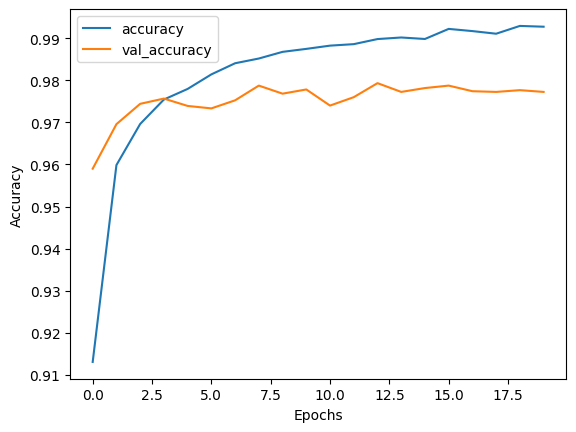

In [11]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Q8: Does the model suffer from overfitting/underfitting?**

The model neither overfit or underfit since the validation accuracy and the training accuracy are near to each other, However, we might have a slight overfit as the model didn't improve the validation accuracy past epoch 3

**Q9: Can we train the model more than 20 epochs?Will that cause overfitting/underfitting?and why?**

**Q10**: Use `evaluate()` method and pass the test images and labels. Then, print the classification accuracy of the test split. 

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9706 - loss: 33.5789
Test accuracy: 0.9754


## Part (2): Artificial Neural Network with Regression Problem

In this section, you will learn how to use artificial neural networks with regression data. The data you will work with has the following format: 

* **Study Hours**: values between 0 and 20.
* **Attendance**: percentages between 0 and 100.
* **Participation**: scores between 0 and 100.
* **Final Grade**: A calculated score based on the other features, with some added noise for realism

**Q11**: Load the data from `student_grades.csv` file using pandas, and display the first five rows.

In [13]:
import pandas as pd
df = pd.read_csv('student_grades.csv')

In [14]:
df

,Study_Hours,Attendance,Participation,Final_Grade
0,7.490802,3.142919,23,402.912849
1,19.014286,63.641041,74,2688.361783
2,3.120373,90.756647,37,2850.857164
3,3.119890,24.929223,83,895.019838
4,1.161672,41.038292,98,1303.350903
...,...,...,...,...
86,9.875912,34.920957,26,1444.909382
87,10.454657,72.595568,1,2592.040225
88,8.550820,89.711026,89,3064.016564
89,0.508383,88.708642,16,2689.558836


**Q12**: Your goal is to make the model predict the final grade for students given the study hours, attendance, and participation data. Split the target from the features in variable `X_train` and `y_train`.

In [15]:
X_train = df.drop('Final_Grade', axis=1)
y_train = df['Final_Grade']

**Q13**: Split the training data into 80% training and 20% validation.

In [16]:
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42)
y_train, y_val = train_test_split(y_train, test_size=0.2, random_state=42)

In [17]:
y_train

64    1366.840936
15    1878.155316
67    2702.804733
77    3061.803663
30    3280.153616
         ...     
20    1050.833928
60    2586.291489
71    1718.066987
14    3040.064970
51    1422.019218
Name: Final_Grade, Length: 72, dtype: float64

**Q14**: As you see from the data, the columns have different ranges. Use the `MinMaxScaler` to normalize the values to be in range [0-1] for the training and validation data.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train

array([[0.82531929, 0.22432208, 0.98979592],
       [0.29113233, 0.54397775, 1.        ],
       [0.78028906, 0.69887277, 0.62244898],
       [0.73783373, 0.82790585, 0.57142857],
       [0.44288359, 0.98582978, 0.5       ],
       [0.02941455, 0.50096783, 0.25510204],
       [0.21074425, 0.81860593, 0.65306122],
       [0.71465291, 0.65211173, 0.59183673],
       [0.06982371, 0.38804932, 0.84693878],
       [0.11872865, 0.97629182, 0.53061224],
       [0.32573127, 0.66724536, 0.53061224],
       [0.98270054, 0.15762687, 0.16326531],
       [0.35964567, 0.95001477, 0.30612245],
       [0.87699703, 0.7648925 , 0.8877551 ],
       [0.78422488, 0.23767258, 0.68367347],
       [0.08454591, 0.67966134, 0.33673469],
       [0.61784442, 0.8179109 , 0.31632653],
       [0.60362655, 1.        , 0.17346939],
       [0.92096055, 0.30032357, 0.25510204],
       [0.71589122, 0.07155196, 0.23469388],
       [0.89843309, 0.53407514, 0.44897959],
       [0.30477112, 0.52297882, 0.20408163],
       [0.

In this lab, we want to test the model in a separated jupyter on a test dataset stored separately. To do so, you need to preprocess the test dataset later with the same computed MinMaxScaler parameters used for the training and validation. Hence, you will save these parameters in a file called `scaler.pkl`.

Run the code below to do it.

In [19]:
# Library needed to store this type of file
import pickle

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file) # To save the variable into the `scaler.pkl` file.

**Q15**: Use the same architecture you used in Q5 but change the input layer to fit the input shape, and the output layer to be one neuron since you predict a regression value (Without activation function).

In [20]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(3,)),
    layers.Dropout(0.10),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.10),
    layers.Dense(1)
])
model.summary()

/home/mohamed/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

**Q16**: Compile your model with the following settings: 
```python
optimizer='adam'
loss='mean_squared_error`
metrics=['mean_absolute_error']
```

In [21]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

**Q17**: Use `fit()` method to train the model as you did previously for 500 epochs.

In [22]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 4767552.0000 - mean_absolute_error: 2002.0054 - val_loss: 2719507.5000 - val_mean_absolute_error: 1403.0070
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4539493.5000 - mean_absolute_error: 1930.4966 - val_loss: 2718903.2500 - val_mean_absolute_error: 1402.8158
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4802387.5000 - mean_absolute_error: 2006.8132 - val_loss: 2718236.5000 - val_mean_absolute_error: 1402.6047
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4627825.5000 - mean_absolute_error: 1971.0592 - val_loss: 2717483.5000 - val_mean_absolute_error: 1402.3657
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4547505.0000 - mean_absolute_error: 1928.9402 - val_loss: 2716604.7500 - val_mean_absolute_error: 1402.0875
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4516641.0000 - mean_absolute_error: 1943.9359 - val_loss: 2715573.2500 - val_mean_absolute_error: 1401.7607
Epoch 7/20
3/3 ━━━━━━

**Q18**: Use below code to plot the training process evalution.

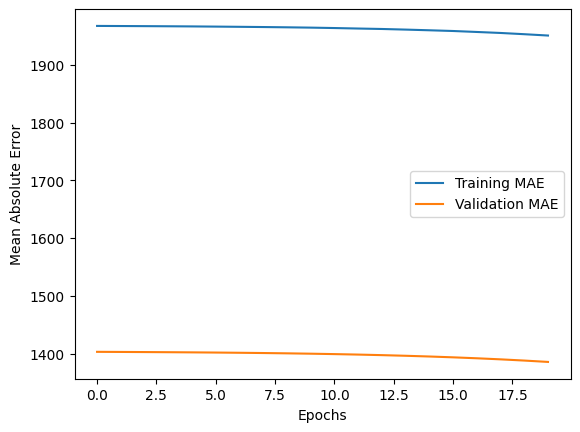

In [23]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

**Q19**: Can you train the model with more epochs? and why?

Yes, we can see that the model underfits the data so we can try training it for a longer time (more epochs)

**Q20**: If yes. Copy the code of Q17 and Q18 in the following cell and increase the number of epochs till you find the model became to overfit. Note that the model will start from the last epoch. That means, if you put 1000 epochs, then the model will continue from the last epoch (the 500) to train extra 1000 epochs. Hence, the total training epochs will be 1000+500 = 1500 epochs.

Epoch 1/100


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4679869.5000 - mean_absolute_error: 1979.9551 - val_loss: 2656507.0000 - val_mean_absolute_error: 1382.9105
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4657064.0000 - mean_absolute_error: 1972.8588 - val_loss: 2647391.2500 - val_mean_absolute_error: 1379.9730
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4310328.0000 - mean_absolute_error: 1890.0272 - val_loss: 2637299.7500 - val_mean_absolute_error: 1376.7134
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4701476.0000 - mean_absolute_error: 1994.4879 - val_loss: 2626139.5000 - val_mean_absolute_error: 1373.0992
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4591015.5000 - mean_absolute_error: 1951.8356 - val_loss: 2613980.2500 - val_mean_absolute_error: 1369.1492
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4519397.0000 - mean_absolute_error: 1930.3228 - val_loss: 2600659.0000 - val_mean_absolute_error: 1364.8066
Epoch 7/100
3/3 

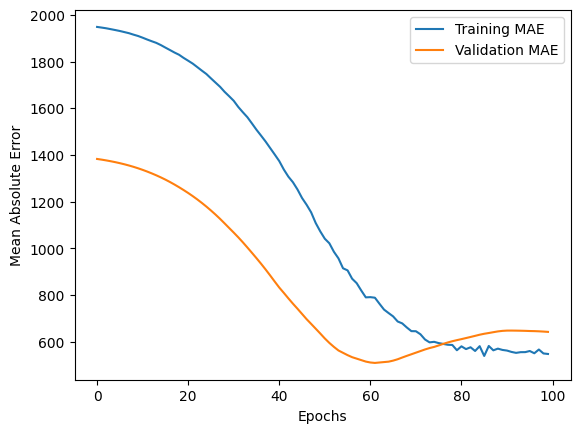

In [24]:
# Fit code from Q17
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


# plot code from Q18
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

**Q21**: What range of epochs you find the model best performing based on the graph?

We can see that around 60 epochs (80 total epochs) the model have the lowest validation accuracy.

**Q22**: Use a different variable name, `model_rmsprop`, and train the same model with optimizer `rmsprop`. Graph the epochs after training to determine at which epoch you should stop. 

In [25]:
# Define the model with model_rmsprop name. (Same architecture)
model_rmsprop = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(3,)),
    layers.Dropout(0.10),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.10),
    layers.Dense(1)
])

# Display summary of the model
model_rmsprop.summary()

/home/mohamed/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile with rmsprop
model_rmsprop.compile(
    optimizer='rmsprop',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 4822941.0000 - mean_absolute_error: 2018.7267 - val_loss: 2719123.0000 - val_mean_absolute_error: 1402.9006
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4740843.0000 - mean_absolute_error: 1997.0646 - val_loss: 2717858.0000 - val_mean_absolute_error: 1402.5093
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4544352.0000 - mean_absolute_error: 1944.5931 - val_loss: 2716322.2500 - val_mean_absolute_error: 1402.0258
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4513686.5000 - mean_absolute_error: 1933.3667 - val_loss: 2714676.0000 - val_mean_absolute_error: 1401.5062
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4576964.0000 - mean_absolute_error: 1949.0732 - val_loss: 2712815.2500 - val_mean_absolute_error: 1400.9200
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4834932.0000 - mean_absolute_error: 2012.2539 - val_loss: 2710822.0000 - val_mean_absolute_error: 1400.2853
Epoc

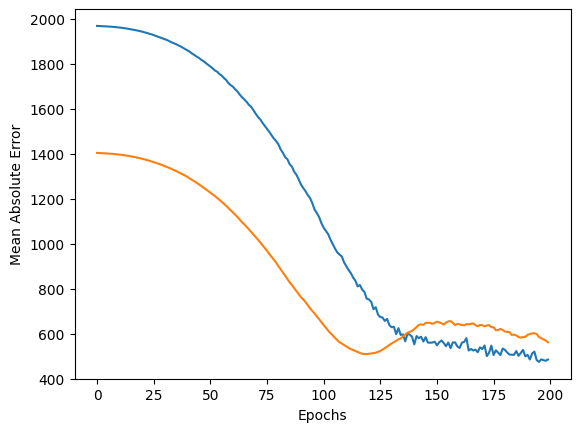

In [27]:
# Train with `fit`, and display the error graph.
model_rmsprop_history = model_rmsprop.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))
# Plot training history
plt.plot(model_rmsprop_history.history['mean_absolute_error'], label='Training MAE')
plt.plot(model_rmsprop_history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.show()


**Q23**: Based on the graphs obtained from both optimizers, which one is better in your opinion, and why?

**Q24**: Based on the last `val_mean_aboslute_error` value in the last epoch for both optimizers, pick the model that has the lowest value and put it in the cell below to save the trained model. Save the model under the following name `trained_model.keras`.

In [28]:
model_rmsprop.save('trained_model.keras')

**Q25**: Open the testing jupyter and follow the instructions there.